# import

In [5]:
import sys
!conda install --yes --prefix {sys.prefix} adjust_text

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install astroML

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - adjust_text

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [8]:
!{sys.executable} -m pip install adjustText

  Using cached adjustText-0.7.3-py3-none-any.whl


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm

import os
from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [10]:
from astropy.time import Time
from astropy.time import TimeYearDayTime
from datetime import datetime
from time import strftime,strptime
import calendar
from dateutil.parser import parse

In [11]:
import numpy as np
import pandas as pd
import os
from astropy.table import Table

In [12]:
from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr

In [13]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

In [14]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [15]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    

In [165]:
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)


In [16]:
from astropy import units as u
from astropy import constants 

## time_convert

In [17]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [3]:
mjd2datetime(59001),mjd2datetime(59001-2)

(datetime.datetime(2020, 6, 1, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2020, 5, 30, 0, 0, tzinfo=datetime.timezone.utc))

In [ ]:
datetime2mjd(datetime(2020, 5, 30, 0, 0))

In [ ]:
convert_date_single(55000),convert_date_single(57100)

In [ ]:
convert_date_single(54800),convert_date_single(57200)

In [ ]:
ax.set_xlim(54800,57200)

## MJD

MJD=JD-2400000.5

In [ ]:
R_BRL=551.5*u.Mpc
print(R_BRL.to(u.lightyear))

In [ ]:
Mass_3C273=4.1e8
Rg_3C273= constants.G*Mass_3C273*u.solMass/constants.c**2
print(Rg_3C273.to(u.cm))

In [ ]:
z_3C273=0.158339
d_3C273=782.7*u.Mpc

In [ ]:
190/(1+z_3C273)/365*u.lightyear.to(u.cm)/6.0541627e13

## magnitude System

In [ ]:
AB magnitude System
This magnitude system is defined such that, when monochromatic flux f is measured in erg sec^-1 cm^-2 Hz^-1,
m(AB) = -2.5 log(f) - 48.60

In [ ]:
Conversion from AB magnitudes to Johnson magnitudes:
The following formulae convert between the AB magnitude systems and those based on Alpha Lyra:
     V	=  V(AB) + 0.044	(+/- 0.004)
     B	=  B(AB) + 0.163	(+/- 0.004)
    Bj	= Bj(AB) + 0.139	(+/- INDEF)
     R	=  R(AB) +-0.055	(+/- INDEF)
     I	=  I(AB) +-0.309	(+/- INDEF)
     g	=  g(AB) + 0.013	(+/- 0.002)
     r	=  r(AB) + 0.226	(+/- 0.003)
     i	=  i(AB) + 0.296	(+/- 0.005)
    Rc	= Rc(AB) +-0.117	(+/- 0.006)
    Ic	= Ic(AB) +-0.342	(+/- 0.008)
Source: Frei & Gunn 1995

## clip_linear_fit

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

!which python2

In [ ]:
# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements
npts = 30
np.random.seed(10)
x = np.random.uniform(0.0, 10.0, npts)
y = line_orig(x)
yunc = np.absolute(np.random.normal(0.5, 2.5, npts))
y += np.random.normal(0.0, yunc, npts)

# make true outliers
y[3] = line_orig(x[3]) + 6 * yunc[3]
y[10] = line_orig(x[10]) - 4 * yunc[10]

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/yunc)
filtered_data = np.ma.masked_array(y, mask=mask)

# plot
plt.figure()
plt.errorbar(x, y, yerr=yunc, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(x, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlim(-2,12)
plt.ylim(-5,25)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### fit_wu2004

In [ ]:
Wu2004_LHbeta_L5100.columns[4],Wu2004_LHbeta_L5100.columns[5]

In [ ]:
xdatas=[]
ydatas=[]
for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    xdatas.append(np.log10(float(flux))+42)
                #xerr=float(err_flux),
    ydatas.append(np.log10(float(flux_Hbeta))+42)
    
xdatas=np.array(xdatas)
ydatas=np.array(ydatas)    

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line

### fit_3C273

In [ ]:
data_3C273_select=data_3C273[data_3C273[data_3C273.colnames[1]]>0]

data_3C273_select

In [ ]:
flux_label=data_3C273_select.colnames[1]
e_flux_label=data_3C273_select.colnames[2]
flux_label_1=data_3C273_select.colnames[3]
e_flux_label_1=data_3C273_select.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)

flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13

xdatas=np.log10(data_3C273_select[flux_label]*flux_scale_5100*5100)
ydatas =np.log10(data_3C273_select[flux_label_1]*flux_scale_Hbeta)

xdatas=np.array(xdatas)
ydatas=np.array(ydatas)

In [ ]:
x=np.log10(data_3C273_select[flux_label]*flux_scale_5100*5100)
y=np.log10(data_3C273_select[flux_label_1]*flux_scale_Hbeta)
spearmanr(x,y),pearsonr(x,y)

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_3C273, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_3C273(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line_3C273

### fit_PKS1510

data_PKS1510

In [ ]:
xdatas=np.log10(np.array(data_PKS1510[flux_label_PKS1510])*flux_scale_5100_PKS1510*5100)
ydatas=np.log10(np.array(data_PKS1510[flux_label_1_PKS1510])*flux_scale_Hbeta_PKS1510)

In [ ]:
len(xdatas),len(ydatas)

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_PKS1510, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_PKS1510(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()    

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
fitted_line_PKS1510

# root_dir 

In [20]:
#root_dir='/Users/brettlv/Downloads/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'
#root_data_dir='/Users/brettlv/Downloads/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/'
#Rphot_dir='/Users/brettlv/Downloads/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Rphot/'

root_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'
root_data_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/'
Rphot_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Rphot/'

lag_data_dir='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data'
data_dir_3C273='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/A 10yr reverberation mapping campaign for 3C273——J_ApJ_876_49/'
data_3C273_dir_mojave='/Volumes/ExtremeSSD/data_source/data_AGN/3C273/3C273/'

data_dir_PKS1510='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data_PKS1510/'

In [22]:
root_dir

'/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'

In [23]:
ls /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/

00CCF/                        R.fits*
00Javelin/                    R.txt*
3C_plot/                      Rphot/
3c273_emissionline/           SMA.xlsx*
Comparison_Stars_table.xlsx*  Sources/
FermiAGN_namelist_ned.xlsx*   V.fits*
PKS 1510-08_R.csv*            V.txt*
PKS 1510-08_V.csv*            pks1510_Rphot_lc.png*
PKS 1510-08_VLBA_I_Jy.csv*    pks1510_Vphot_lc.png*
PKS 1510-08_VLBA_Pol.csv*     pks1510_pol_lc.png*
PKS 1510-08_VLBA_Pol_PA.csv*  sma_info.xlsx*
PKS 1510-08_pol.csv*          vlbaCalib.txt*
PKS 1510-08_pol_pa.csv*       ~$FermiAGN_namelist_ned.xlsx*
Plot_lc/                      ~$sma_info.xlsx*


In [21]:
root_data_dir

'/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/'

In [24]:
lag_data_dir

'/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data'

In [ ]:
!open /Volumes/ExtremeSSD/data_source/data_AGN/3C273/3C273/

# Sources

In [128]:
Fermi_AGN_list=pd.read_excel('%s/FermiAGN_namelist_ned.xlsx'%root_dir,header=0,skiprows=[1,2])
Fermi_AGN_list_name_redshift=Fermi_AGN_list[['      Input Object Name       ',' Redshift ']]

for i in range(len(Fermi_AGN_list_name_redshift)):
    if isinstance(Fermi_AGN_list_name_redshift.iloc[i][1],(int,float)):
        
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=Fermi_AGN_list_name_redshift.iloc[i][1]
    else:
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=0
        
Fermi_AGN_list_name_redshift_T=Fermi_AGN_list_name_redshift[Fermi_AGN_list_name_redshift['z_value']>0]
Fermi_AGN_list_name_redshift_T=drop_index(Fermi_AGN_list_name_redshift_T)        

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_27783/541743827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fermi_AGN_list_name_redshift.loc[i,'z_value']=Fermi_AGN_list_name_redshift.iloc[i][1]


In [129]:
sources_individual_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'

In [130]:
import requests
r=requests.get(sources_individual_url)
demo=r.text


from bs4 import BeautifulSoup

sources_individual=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            name_i=link.get('href')[8:-5]
            if name_i not in sources_individual:
                sources_individual.append(name_i)
                #print(name_i)

In [131]:
import requests
from bs4 import BeautifulSoup

r=requests.get(sources_individual_url)
demo=r.text


sources_individual_Name=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            #name_i=link.get('href')[8:-5]
            Name_i=link.get_text()
            if Name_i not in sources_individual:
                sources_individual_Name.append(Name_i)
                #print(Name_i)

In [132]:
Source_Name_dict = dict(zip(sources_individual,sources_individual_Name))

Source_name_dict = dict(zip(sources_individual_Name,sources_individual))

In [133]:
Source_Name_dict 

{'pmn_j0017': 'PMN J0017-0512',
 'pks0106': 'PKS 0106+013',
 'mg1_j021114': 'MG1 J021114+1051',
 '3c66a': '3C 66A',
 '4c28.07': '4C 28.07',
 'ao0235': 'AO 0235+164',
 '1h0323': '1H 0323+342',
 'cta26': 'CTA 26',
 'pks0402': 'PKS 0402-362',
 'pks0420': 'PKS 0420-014',
 'pks0454': 'PKS 0454-234',
 'pks0458': 'PKS 0458-02',
 'pks0502': 'PKS 0502+049',
 'mg1_j050533': 'MG1 J050533+0415',
 'txs0506': 'TXS 0506+056',
 'pks0507': 'PKS 0507+179',
 'ver_j0521': 'VER J0521+211',
 'pks0528': 'PKS 0528+134',
 'txs0536': 'TXS 0536+145',
 'txs0552': 'TXS 0552+398',
 'b2_0619': 'B2 0619+33',
 'b3_0650': 'B3 0650+453',
 's5_0716': 'S5 0716+714',
 '4c14.23': '4C 14.23',
 'pks0735': 'PKS 0735+178',
 'pks0736': 'PKS 0736+01',
 'bzu_j0742': 'BZU J0742+5444',
 'sdss_j0844': 'SDSS J084411+5312',
 'pks0805': 'PKS 0805-077',
 'oj248': 'OJ 248',
 'oj287': 'OJ 287',
 'pks0906': 'PKS 0906+015',
 'pmn_j0948': 'PMN J0948+0022',
 's4_0954': 'S4 0954+658',
 's4_1030': 'S4 1030+61',
 's5_1044': 'S5 1044+71',
 'mrk421

In [ ]:
from __future__ import unicode_literals
import json
import numpy as np
import pickle

class JsonEncoder(json.JSONEncoder):

    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        #elif isinstance(obj, datetime):                                 
            #return obj.__str__()
        else:
            return super(JsonEncoder, self).default(obj)
'''————————————————
版权声明：本文为CSDN博主「疯狂的小猪oO」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/u014657795/article/details/85868413
'''    



## load local Source_name_dict

import json
import numpy as np
import pickle

with open("Source_Name_dict_pickle.json", "wb") as f:# writr dict
    pickle.dump(Source_Name_dict , f,pickle.HIGHEST_PROTOCOL)


In [ ]:
from __future__ import unicode_literals
import json
import numpy as np
import pickle
with open('Source_Name_dict_pickle.json', "rb") as f:# load dict
    Source_Name_dict_load_pickle = pickle.load(f)

In [ ]:
Source_Name_dict_load_pickle_Name2url  = dict(zip(Source_Name_dict_load_pickle .values(), Source_Name_dict_load_pickle .keys())) 

Source_Name_dict_load_pickle 

In [ ]:
Source_Name_dict_load_pickle_Name2url

In [ ]:
'%.3e'%10**9.06

# 3C 273

## Zhangzhixiang 2019

In [ ]:
cat '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/A 10yr reverberation mapping campaign for 3C273——J_ApJ_876_49/ReadMe'

In [124]:
table_3C273_path=os.path.join(data_dir_3C273,'table1.dat')
readme_3C273_path=os.path.join(data_dir_3C273,'ReadMe')
data_3C273=Table.read(table_3C273_path,
                      readme=readme_3C273_path,
                      format="ascii.cds",)

data_3C273['mjd2']=data_3C273['JD2']-2400000.5
data_3C273['mjd1']=data_3C273['JD1']-2400000.5
data_3C273['mjd']=data_3C273['JD1']-2400000.5

In [ ]:
data_3C273.colnames

In [ ]:
readme_3C273_path

In [ ]:
cat '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/A 10yr reverberation mapping campaign for 3C273——J_ApJ_876_49/ReadMe'

In [ ]:
min(data_3C273[data_3C273.colnames[1]]),max(data_3C273[data_3C273.colnames[1]])

In [ ]:
min(data_3C273[data_3C273.colnames[3]]),max(data_3C273[data_3C273.colnames[3]])

## Liyanrong_decomposition

In [ ]:
Jet3C273_decomp=pd.read_csv('/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/3C273_jet.txt',header=None,delimiter='\s')
Disk3C273_decomp=pd.read_csv('/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/3C273_disk.txt',header=None,delimiter='\s')


In [ ]:
Jet3C273_decomp.columns=['JD-2450000','Jetflux_V','err_Jetflux_V']
Disk3C273_decomp.columns=['JD-2450000','Diskflux_V','err_Diskflux_V']

In [ ]:
Jet3C273_decomp['mjd']=Jet3C273_decomp['JD-2450000']+50000-0.5
Disk3C273_decomp['mjd']=Disk3C273_decomp['JD-2450000']+50000-0.5

In [ ]:
Disk3C273_decomp

In [ ]:
Jet3C273_decomp

### plot_decomp

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8*1.5,6*1.5))

'''for i in range(len(table_ATCA_3C273_5GHz)):
    flux_and_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]   
    ax.errorbar(table_ATCA_3C273_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
'''

ax.errorbar(mojave_15GHz_3c273['mjd'],mojave_15GHz_3c273['flux'],#*1.2,
            fmt='.',label='VLBA_15GHz')

ax.errorbar(ovro_40m_3C273['mjd'],ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='.',label='OVRO_15GHz')
    

set_ax_tick(ax) 
ax.set_title('3C 273')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


ax2=ax.twinx()
#ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['F5100'],label='5100')
#ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['FHbeta'],label='Hbeta')
ax2.errorbar(Disk3C273_decomp['mjd'],
            Disk3C273_decomp['Diskflux_V'],
            yerr=Disk3C273_decomp['err_Diskflux_V'],
                            label='Disk_decomp')

ax2.errorbar(Jet3C273_decomp['mjd'],Jet3C273_decomp['Jetflux_V'],
            yerr=Jet3C273_decomp['err_Jetflux_V'],label='Jet_decomp')


ax2.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.79, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
fig.tight_layout()

range_l,range_r=(55000-200,59250)
ax.set_xlim(range_l,range_r)
plt.savefig('/Users/brettlv/Downloads/3C273_decomp_lc_radio_optical_%d_%d.png'%(range_l,range_r),dpi=400)


In [ ]:
Disk3C273_decomp.columns

In [ ]:
Jet3C273_decomp.columns

## info_3C273

In [134]:
source_Name='3C 273'
source_name=Source_name_dict[source_Name]
source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
D_cm_3C273=cosmo.luminosity_distance(source_z.values[0]).to(u.cm)

## flux_scale_zhang3c273

In [135]:
flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13

In [ ]:
D_cm_3C273.value

log H 1.126 0.004 log 5100 6.89 0.20 L L ()( ) ( )( ) a =  +-  ( ) 5
log H 0.947 0.002 log 5100 0.45 0.09 , L L ()( ) ( )( ) b =  +-  ( )

## Wu2004load L5100_LHbeta

In [121]:
Wu2004_LHbeta_L5100=pd.read_csv('/Users/lyubing/IHEPBox/JetRM_plot/Wu2004_LHbeta_L5100.py',delimiter='&')#SMA

In [122]:
Wu2004_LHbeta_L5100.columns#.iloc[0]#.columns

Index(['Name    ', '   $z$    ', ' $A_B$ ', '$R_{\rm BLR}$      ',
       ' $ L_{5100~{\rm \AA}}$ ', '  $L_{{\rm H}_\beta}$ ', ' Ref.\\'],
      dtype='object')

12- 16 F5.2   10-17W/m2/nm   F5100    [14/24.1]? Continuum flux at 5100{AA},
                                        in 10^-15^erg/s/cm^2^/{AA}
18- 21 F4.2   10-17W/m2/nm e_F5100    [0.2/0.3]? Uncertainty in F5100
23- 27 F5.2   10-16W/m2      FHbeta   [15.5/19.7]? H{beta} emission-line flux,
                                        in 10^-13^erg/s/cm^2^
29- 32 F4.2   10-16W/m2    e_FHbeta   [0.15/0.3]? Uncertainty in FHbeta

In [ ]:
fitted_line

## plot LHbeta-L5100

F5100 e_F5100
FHbeta e_FHbeta


/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_27783/126134534.py:27: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(x=np.log10(data_3C273[flux_label]*flux_scale_5100*5100),
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_27783/126134534.py:29: RuntimeWarning: divide by zero encountered in log10
  y=np.log10(data_3C273[flux_label_1]*flux_scale_Hbeta),


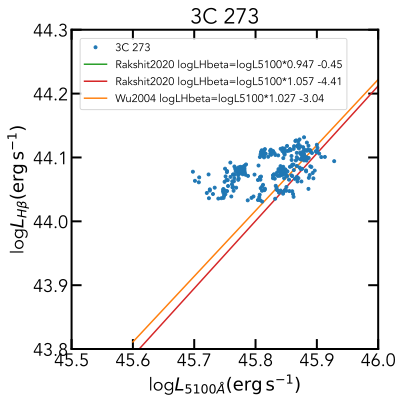

In [136]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''
flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)



ax.errorbar(x=np.log10(data_3C273[flux_label]*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1]*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')



slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_Hbeta_L5100.png',dpi=400)


F5100 e_F5100
FHbeta e_FHbeta


/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_27783/2106976129.py:28: RuntimeWarning: divide by zero encountered in log10
  ax.errorbar(x=np.log10(data_3C273[flux_label]*flux_scale_5100*5100),
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_27783/2106976129.py:30: RuntimeWarning: divide by zero encountered in log10
  y=np.log10(data_3C273[flux_label_1]*flux_scale_Hbeta),


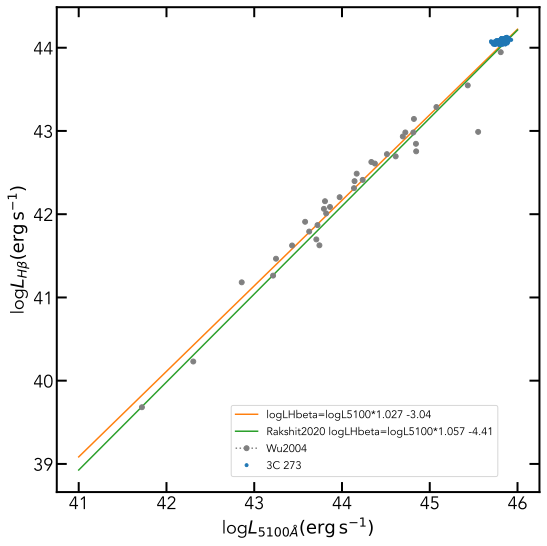

In [137]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))

for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')

flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)




ax.errorbar(x=np.log10(data_3C273[flux_label]*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1]*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(41,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))

'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
''' 
slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
#ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.35, 0.19),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

#ax.set_xlim(40,47)
#ax.set_ylim(39,46)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/AGN_Hbeta_L5100.png',dpi=400)


In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(4):
    flux_label=data_3C273.colnames[i*2+1]
    e_flux_label=data_3C273.colnames[i*2+2]
    
    ax.errorbar(data_3C273['mjd'],data_3C273[flux_label],data_3C273[e_flux_label],
                 fmt='.',label=flux_label)

ax.errorbar(mojave_15GHz_3c273['mjd'],mojave_15GHz_3c273['flux'],
            fmt='.',label='VLBA_15GHz')

ax.errorbar(ovro_40m_3C273['mjd'],ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='.',label='OVRO_15GHz')
    
    
ax.set_xlim(54000,58500)

    
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/zhang_line_lc_origin.png',dpi=400)


In [ ]:
x=data_3C273['mjd']
y=data_3C273['F5100']
yunc=np.ones(len(x))

fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/yunc)
filtered_data = np.ma.masked_array(y, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.errorbar(x, y, yerr=yunc, fmt="ko", fillstyle="none", label="Clipped Data")
ax.errorbar(x, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(x, fitted_line(x), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)

plt.xlabel('MJD')
plt.ylabel('F5100')
plt.legend()
plt.show()

## OVRO

In [ ]:
ovro_40m_3C273=pd.read_csv('%s/J1229+0203_OVRO_40m.csv'%data_3C273_dir_mojave)

In [ ]:
min(ovro_40m_3C273['flux']),max(ovro_40m_3C273['flux'])

## mojave_15GHz

In [ ]:
mojave_15GHz_3c273=pd.read_excel('%s/VLBA_3c273.xlsx'%data_3C273_dir_mojave,sheet_name='Sheet2')
mojave_15GHz_3c273=mojave_15GHz_3c273[mojave_15GHz_3c273['VLBA I'].notnull()]
mojave_15GHz_3c273=mojave_15GHz_3c273[mojave_15GHz_3c273['VLBA Code'].notnull()]

mojave_15GHz_3c273.columns=['Epoch', 'VLBA Code', 'VLBA I', 'VLBA P', 'VLBA percentage', 'VLBA degree',
                           'I Image (Nat. Weight)', 'Tapered I Image',
                           'Tapered I Image (Widefield)', 'Visibility', 
                            'Stokes I Radplot', 'Pol.','note']


mojave_15GHz_3c273['mjd']=convert_mjd(mojave_15GHz_3c273['Epoch'])
mojave_15GHz_3c273['flux']=mojave_15GHz_3c273['VLBA I']/1000
mojave_15GHz_3c273['err']=0


In [ ]:
mojave_15GHz_3c273

In [ ]:
mojave_15GHz_3c273[['mjd','flux','err']]

## Liyanrong 2020 UVOT

In [ ]:
data_3C273_UVOT=pd.read_excel(os.path.join(data_dir_3C273,'..','UVOT_3C273.xlsx'))

In [ ]:
data_3C273_UVOT['mjd']=data_3C273_UVOT['JD-2,450,000']+50000-0.5

In [ ]:
data_3C273_UVOT

In [ ]:
root_dir.replace(' ','_')

## SMA_3C273

In [ ]:
SMA_3c273=pd.read_csv(os.path.join(lag_data_dir,'SMA_3C273.py'),delimiter='\s+')#SMA

In [ ]:
SMA_3c273.columns

In [ ]:
day=SMA_3c273['day']
month=SMA_3c273['month']
year=SMA_3c273['year']
time=SMA_3c273['time']

month_number=[]
for i in month.values:
    month_number.append(strptime(i,'%b').tm_mon)
    
h=[]
m=[]
for i in time.values:
    h.append(i.split(":")[0])
    m.append(i.split(":")[1])

SMA_3c273['mon_num']=month_number
SMA_3c273['hour']=h
SMA_3c273['minute']=m

##############################
#day=SMA_3c273['day']
month_num=SMA_3c273['mon_num']
#year=SMA_3c273['year']
hour=SMA_3c273['hour']
minute=SMA_3c273['minute']


In [ ]:
times=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    times.append(Time(datetime(y_,m_,d_,int(h_),int(mi_),0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
SMA_3c273['mjd']=times

convert_date_single(52657.272917)

In [ ]:
SMA_3c273

In [ ]:
SMA_3c273_1mm=SMA_3c273[SMA_3c273['BAND']=='1mm']
SMA_3c273_850=SMA_3c273[SMA_3c273['BAND']=='850']

In [ ]:
len(SMA_3c273),len(SMA_3c273_1mm),len(SMA_3c273_850)

In [ ]:
SMA_3c273_850

## ATCA_calibrator

In [ ]:
ATCA_3C273_url='https://www.narrabri.atnf.csiro.au/calibrators/calibrator_database_viewcal?source=1226+023&detailed=true'

In [ ]:
table_ATCA_3C273=pd.read_html(ATCA_3C273_url)

In [ ]:
len(table_ATCA_3C273),table_ATCA_3C273,table_ATCA_3C273[18]

In [ ]:
table_ATCA_3C273_origin=pd.read_excel(os.path.join(lag_data_dir,'3C273_ATCA_calitrator_origin.xlsx'))

In [ ]:
table_ATCA_3C273_origin.columns

table_ATCA_3C273_origin[table_ATCA_3C273_origin['Epoch'].str.startswith('Band')]

In [ ]:
table_ATCA_3C273_origin.columns

table_ATCA_3C273_origin.iloc[0]

In [ ]:
if isinstance(table_ATCA_3C273_origin.loc[2,'Closure Phase'],str):
    print(table_ATCA_3C273_origin.loc[2,'Closure Phase'])

table_ATCA_3C273=pd.DataFrame([])

for i in range(len(table_ATCA_3C273_origin)):
    if isinstance(table_ATCA_3C273_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_3C273_origin.iloc[i]
        print(i)
    else:
        print(table_ATCA_3C273_origin.loc[i,'Closure Phase'])

i=3
row_table = pd.DataFrame(
           [
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[3]],       
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[3]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[8]]
           ],            
            )#columns=table_ATCA_3C273_origin.columns

In [ ]:
row_table.T

In [ ]:
table_ATCA_3C273=pd.DataFrame([])

for i in range(len(table_ATCA_3C273_origin)):
    if isinstance(table_ATCA_3C273_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_3C273_origin.iloc[i]
        #print(i)
    
    else:
        print(i)
        
        row_table = pd.DataFrame(
           [
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[3]],       
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[3]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[8]],
           ])
            
        row_table=row_table.T
        row_table.columns= table_ATCA_3C273_origin.columns   
            
        
    table_ATCA_3C273=table_ATCA_3C273.append(row_table,ignore_index=True)        
          
        
    
    

In [ ]:
year=[]
month=[]
day=[]

for i in table_ATCA_3C273['Epoch'].values:
    year.append(i.split("-")[0])
    month.append(strptime(i.split("-")[1],'%b').tm_mon)
    day.append(i.split("-")[2])
    
    
times=[]
for i,(d_,m_,y_,) in enumerate(zip(day,month,year)):                 
    times.append(Time(datetime(int(y_),m_,int(d_),0,0,0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
table_ATCA_3C273['mjd']=times  m  

table_ATCA_3C273.to_excel(os.path.join(lag_data_dir,'3C273_ATCA_calitrator_modified.xlsx'),index=False)

In [ ]:
table_ATCA_3C273=pd.read_excel(os.path.join(lag_data_dir,'3C273_ATCA_calitrator_modified.xlsx'))

In [ ]:
table_ATCA_3C273.columns

In [ ]:
table_ATCA_3C273_5GHz=table_ATCA_3C273[abs(table_ATCA_3C273['Frequency']-5000)<1000]
table_ATCA_3C273_5GHz=drop_index(table_ATCA_3C273_5GHz)

## plot 3C 273

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

'''for i in range(len(table_ATCA_3C273_5GHz)):
    flux_and_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]   
    ax.errorbar(table_ATCA_3C273_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
'''

ax.errorbar(mojave_15GHz_3c273['mjd'],mojave_15GHz_3c273['flux']*1.2,
            fmt='.',label='VLBA_15GHz')

ax.errorbar(ovro_40m_3C273['mjd'],ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='.',label='OVRO_15GHz')
    

set_ax_tick(ax) 
ax.set_title('3C 273')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


ax2=ax.twinx()
ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['F5100'],label='5100')
ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['FHbeta'],label='Hbeta')

ax2.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.79, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
fig.tight_layout()

range_l,range_r=(57000-200,58250)
ax.set_xlim(range_l,range_r)
plt.savefig('/Users/brettlv/Downloads/3C273_lc_radio_optical_%d_%d.png'%(range_l,range_r),dpi=400)


In [ ]:
data_3C273.colnames

# PKS1510-089

## flux_scale_PKS1510

In [25]:
D_cm_PKS1510=cosmo.luminosity_distance(0.361).to(u.cm)
flux_scale_5100_PKS1510=4*np.pi*(D_cm_PKS1510.value)**2*1.0e-15 # erg s−1 cm−2 Å−1
flux_scale_Hbeta_PKS1510=4*np.pi*(D_cm_PKS1510.value)**2*1.0e-15 #erg s−1 cm−2

## SMA_1510

In [ ]:
SMA_PKS1510=pd.read_csv(os.path.join(lag_data_dir,'SMA_PKS1510.py'),skiprows=1,delimiter='\s+')#SMA

In [ ]:
SMA_PKS1510

In [ ]:
day=SMA_PKS1510['day']
month=SMA_PKS1510['month']
year=SMA_PKS1510['year']
time=SMA_PKS1510['time']

month_number=[]
for i in month.values:
    month_number.append(strptime(i,'%b').tm_mon)

h=[]
m=[]
for i in time.values:
    h.append(i.split(":")[0])
    m.append(i.split(":")[1])

SMA_PKS1510['mon_num']=month_number
SMA_PKS1510['hour']=h
SMA_PKS1510['minute']=m

##############################
#day=SMA_PKS1510['day']
month_num=SMA_PKS1510['mon_num']
#year=SMA_PKS1510['year']
hour=SMA_PKS1510['hour']
minute=SMA_PKS1510['minute']

In [ ]:
times=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):
    times.append(Time(datetime(y_,m_,d_,int(h_),int(mi_),0),scale='ut1').mjd)

'''
    timesut=[]
    for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))
    '''
SMA_PKS1510['mjd']=times

In [ ]:
SMA_PKS1510_1mm=SMA_PKS1510[SMA_PKS1510['BAND']=='1mm']
SMA_PKS1510_850=SMA_PKS1510[SMA_PKS1510['BAND']=='850']

In [ ]:
len(SMA_PKS1510),len(SMA_PKS1510_1mm),len(SMA_PKS1510_850)

In [ ]:
SMA_PKS1510_1mm.columns

In [ ]:
1e-3*300e9

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

ax.errorbar(SMA_PKS1510_1mm['mjd'],SMA_PKS1510_1mm['FLUX(JY)'],SMA_PKS1510_1mm['ERROR'],
              ls=':',marker='.',markersize=10,color='r',label='SMA 300GHz')
    
set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')



ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    

ax.set_xlim(54800,57200)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/SMA_calibrator_300GHz.png'
save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/SMA_calibrator_300GHz_54800_57200.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
plt.close()

## Spectroscopic_PKS1510

In [42]:
data_dir_PKS1510='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/'

In [43]:
table_PKS1510_path=os.path.join(data_dir_PKS1510,'table1.dat')
readme_PKS1510_path=os.path.join(data_dir_PKS1510,'ReadMe')
data_PKS1510=Table.read(table_PKS1510_path,
                      readme=readme_PKS1510_path,
                      format="ascii.cds",)


In [44]:
readme_PKS1510_path

'/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/ReadMe'

In [45]:
cat '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/ReadMe'

J/A+A/642/A59       PKS 1510-089 spectroscopic light curves      (Rakshit, 2020)
Broad line region and black hole mass of PKS 1510-089 from spectroscopic
reverberation mapping.
    Rakshit S.
    <Astron. Astrophys. 642, A59 (2020)>
    =2020A&A...642A..59R        (SIMBAD/NED BibCode)
ADC_Keywords: Active gal. nuclei ; Spectroscopy ; Spectra, optical
Keywords: galaxies: active - galaxies: nuclei -
          galaxies: individual: PKS 1510-089 -
          quasar: supermassive black holes - techniques: spectroscopic

Abstract:
    Reverberation results of the flat spectrum radio quasar PKS 1510-089
    from 8.5 years of spectroscopic monitoring carried out at Steward
    Observatory over nine observing seasons between December 2008 and June
    2017 are presented. Optical spectra show strong H{beta}, H{gamma}, and
    FeII emission lines overlying on a blue continuum. All the continuum
    and emission line light curves show significant variability with
    fractional root-mean-square var

In [ ]:
data_PKS1510.columns

In [ ]:
data_PKS1510

for i in data_PKS1510['FHb']*flux_scale_Hbeta_PKS1510:
    print(i)

In [ ]:
data_PKS1510['MJD'][0]

In [ ]:
flux_scale_Hbeta_PKS1510

### plot LHbeta_L5100

In [ ]:
data_PKS1510.colnames

In [ ]:
flux_label_PKS1510=data_PKS1510.colnames[1]
e_flux_label_PKS1510=data_PKS1510.colnames[2]
flux_label_1_PKS1510=data_PKS1510.colnames[3]
e_flux_label_1_PKS1510=data_PKS1510.colnames[4]
print(flux_label_PKS1510,e_flux_label_PKS1510)
print(flux_label_1_PKS1510,e_flux_label_1_PKS1510)

In [ ]:
D_cm_PKS1510.value

In [ ]:
x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100)
y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510)
spearmanr(x,y),pearsonr(x,y)

In [ ]:
flux_label_1_PKS1510

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''




ax.errorbar(x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100),
            #xerr=np.log10(data_PKS1510[e_flux_label]*flux_scale*5100),
            y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510),
            #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')




L5100_linspace=np.linspace(45.0,46)

slope=1.02747111
offset=3.04154998
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 NTD=2')



slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,ls='--',label='Rakshit2020 NTD=2 ')




slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,ls='--',label='Rakshit2020 NTD=2 ')




ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

ax.set_title('PKS 1510-089')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.0,46.2)
ax.set_ylim(43,43.5)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_Hbeta_L5100.png',dpi=400)



### plot NTD

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''


for i in range(len(data_PKS1510)):
    L5100=data_PKS1510.loc[i,flux_label_PKS1510]*flux_scale_5100_PKS1510*5100
    logL5100= np.log10(L5100)
    LHb=data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510
    logLHb= np.log10(LHb)
    logL_p= (logLHb+4.41)/1.057 # log 𝐿H𝛽 = „1.057±0.002” log 𝐿5100‚„−4.41±0.10”.
    NTD= 10**(logL5100-logL_p)
    
    ax.errorbar(
            x=logL5100,
            y=NTD,           
            #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')



'''slope=1.02747111
offset=3.04154998
L5100_linspace=np.linspace(45.0,46)
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


'''





ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

ax.set_title('PKS 1510-089')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

#ax.set_xlim(45.5,46)
#ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_NTD_L5100.png',dpi=400)



In [ ]:
lag_data_dir

In [ ]:
!open '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/'

## OVRO_extractdata

In [41]:
table_OVRO_PKS1510_extract=pd.read_csv(os.path.join(data_dir_PKS1510,'PKS1510_webdigit.csv'),header=None)
table_OVRO_PKS1510_extract.columns=['mjd','flux_15GHZ_ovro']
table_OVRO_PKS1510_extract['err']=table_OVRO_PKS1510_extract['flux_15GHZ_ovro']*0.05

In [ ]:
table_OVRO_PKS1510_extract

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(12,3))
ax.errorbar(table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[0]],
           table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[1]],
           #table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[0]],
            ls='',marker='.'
            )

## ATCA

In [ ]:
table_ATCA_PKS1510_origin=pd.read_excel(os.path.join(lag_data_dir,'PKS1510_ATCA_origin.xlsx'))

In [ ]:
table_ATCA_PKS1510_origin.columns

In [ ]:
table_ATCA_PKS1510=pd.DataFrame([])

for i in range(len(table_ATCA_PKS1510_origin)):
    if isinstance(table_ATCA_PKS1510_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_PKS1510_origin.iloc[i]
    #print(i)

    else:
        print(i)
        
        row_table = pd.DataFrame(
                                 [
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[0]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[1]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[2]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[3]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[0]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[1]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[2]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[3]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[8]],
                                  ])
                                  
        row_table=row_table.T
        row_table.columns= table_ATCA_PKS1510_origin.columns

    table_ATCA_PKS1510=table_ATCA_PKS1510.append(row_table,ignore_index=True)

In [ ]:
table_ATCA_PKS1510['Epoch'][0].split('-')

In [ ]:
strptime('Nov','%b').tm_mon

In [ ]:
year=[]
month=[]
day=[]

for i in table_ATCA_PKS1510['Epoch'].values:
    year.append(i.split("-")[0])
    month.append(strptime(i.split("-")[1],'%b').tm_mon)
    day.append(i.split("-")[2])

In [ ]:
times=[]
for i,(d_,m_,y_,) in enumerate(zip(day,month,year)):                 
    times.append(Time(datetime(int(y_),m_,int(d_),0,0,0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
table_ATCA_PKS1510['mjd']=times

In [ ]:
table_ATCA_PKS1510.columns

table_ATCA_PKS1510.to_excel(os.path.join(lag_data_dir,'PKS1510_ATCA_calitrator_modified.xlsx'),index=False)

In [ ]:
table_ATCA_PKS1510=pd.read_excel(os.path.join(lag_data_dir,'PKS1510_ATCA_calitrator_modified.xlsx'))

In [ ]:
table_ATCA_PKS1510_5GHz=table_ATCA_PKS1510[abs(table_ATCA_PKS1510['Frequency']-5000)<1000]

table_ATCA_PKS1510_5GHz=drop_index(table_ATCA_PKS1510_5GHz)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(len(table_ATCA_PKS1510_5GHz)):
    flux_and_err=table_ATCA_PKS1510_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]
    #print(flux,err_flux)
    ax.errorbar(table_ATCA_PKS1510_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
    
set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    

ax.set_xlim(54800,57200)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/ATCA_calibrator_VLA_lc_5GHz.png'
save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/ATCA_calibrator_VLA_lc_5GHz_54800_57200.png'

plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
plt.close()

## mojave_15GHz_VLBA

In [60]:
data_PKS1510_dir_mojave=lag_data_dir

In [61]:
mojave_15GHz_PKS1510=pd.read_excel('%s/VLBA_PKS1510_089.xlsx'%data_PKS1510_dir_mojave,sheet_name='Sheet1')
mojave_15GHz_PKS1510=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA I'].notnull()]
mojave_15GHz_PKS1510=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA Code'].notnull()]

mojave_15GHz_PKS1510.columns=['Epoch', 'VLBA Code', 'VLBA I', 'VLBA P', 'VLBA percentage', 'VLBA degree',
                            'I Image (Nat. Weight)', 'Tapered I Image',
                            'Tapered I Image (Widefield)', 'Visibility',
                            'Stokes I Radplot', 'Pol.','note']


mojave_15GHz_PKS1510['mjd']=convert_mjd(mojave_15GHz_PKS1510['Epoch'])
mojave_15GHz_PKS1510['flux']=mojave_15GHz_PKS1510['VLBA I']/1000
mojave_15GHz_PKS1510['err']=0
mojave_15GHz_PKS1510=drop_index(mojave_15GHz_PKS1510)

In [ ]:
min(mojave_15GHz_PKS1510['flux']),max(mojave_15GHz_PKS1510['flux'])

mojave_15GHz_PKS1510.iloc[83]#.columns

In [ ]:
mojave_15GHz_PKS1510.iloc[0]['VLBA P']

mojave_15GHz_PKS1510.loc[0,'VLBA P']

In [ ]:
mojave_15GHz_PKS1510

In [ ]:
mojave_15GHz_PKS1510.columns

### pol

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(len(mojave_15GHz_PKS1510)):
    if isinstance(mojave_15GHz_PKS1510.loc[i,'VLBA P'],(int,float)):
        ax.errorbar(mojave_15GHz_PKS1510.loc[i,'mjd'],
                     mojave_15GHz_PKS1510.loc[i,'VLBA P'],
                     
                    color='b',marker='*',markersize=10,label='mojave_15GHz_P_flux')




ax2=ax.twinx()
for i in range(len(mojave_15GHz_PKS1510)):
    if isinstance(mojave_15GHz_PKS1510.loc[i,'VLBA percentage'],(int,float)):
    #if mojave_15GHz_PKS1510.loc[i,'VLBA P']!='no data':
        #print(mojave_15GHz_PKS1510.loc[i,'mjd'],mojave_15GHz_PKS1510.loc[i,'VLBA P'])
        
        ax2.errorbar(mojave_15GHz_PKS1510.loc[i,'mjd'],
                    mojave_15GHz_PKS1510.loc[i,'VLBA percentage'],
                   color='r',marker='.',markersize=10,label='mojave_15GHz_Pol percentage')



#set_ax_tick(ax) 

ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux(mJy)')
ax2.set_ylabel(r'Pol(deg)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


#ax2.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.56, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    

ax.set_xlim(54800,57200)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_pol_lc.png'
save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_pol_lc_54800_57200.png'

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', )
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)

ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)



plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
plt.close()

### I

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

ax.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls=':',marker='.',markersize=10,color='r',label='mojave_15GHz')


set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux(mJy)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30)    

ax.set_xlim(54800,57200)


ax2=



save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc_54800_57200.png'

#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
plt.close()

In [108]:
data_PKS1510.colnames

['MJD',
 'F5100',
 'e_F5100',
 'FHb',
 'e_FHb',
 'FHg',
 'e_FHg',
 'F5100D',
 'e_F5100D',
 'FHbD',
 'e_FHbD',
 'FHgD',
 'e_FHgD',
 'L5100',
 'LHb',
 'logL5100',
 'logLHb',
 'logLp',
 'Lp',
 'NTD',
 'L5100minusLp']

## lagdata_PKS1510

In [26]:
data_dir_PKS1510

'/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data_PKS1510/'

In [27]:
ls /Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data_PKS1510

PKS 1510-08_R.csv*                   PKS 1510-08_pol.csv*
PKS 1510-08_V.csv*                   PKS 1510-08_pol_pa.csv*
PKS 1510-08_VLBA_I_Jy.csv*           PKS1510-089——OVROlightcurve.png*
PKS 1510-08_VLBA_Pol.csv*            PKS1510_webdigit.csv*
PKS 1510-08_VLBA_Pol_PA.csv*


In [65]:
lag_15GHz_PKS1510=mojave_15GHz_PKS1510[['mjd','flux','err']]
lag_15GHz_PKS1510.columns=['t','flux','err']
lag_15GHz_PKS1510=lag_15GHz_PKS1510.sort_values('t')
lag_mojave15GHz_PKS1510=drop_index(lag_15GHz_PKS1510)

In [46]:
lag_PKS1510_ovro=table_OVRO_PKS1510_extract[['mjd','flux_15GHZ_ovro','err']]
lag_PKS1510_ovro.columns=['t','flux','err']

In [148]:
lag_PKS1510_15GHz_combine=pd.concat([lag_mojave15GHz_PKS1510,lag_PKS1510_ovro])
lag_PKS1510_15GHz_combine=lag_PKS1510_15GHz_combine.sort_values('t')
lag_PKS1510_15GHz_combine=drop_index(lag_PKS1510_15GHz_combine)

lag_PKS1510_15GHz_combine

In [48]:
data_PKS1510.colnames

['MJD',
 'F5100',
 'e_F5100',
 'FHb',
 'e_FHb',
 'FHg',
 'e_FHg',
 'F5100D',
 'e_F5100D',
 'FHbD',
 'e_FHbD',
 'FHgD',
 'e_FHgD']

In [51]:
lag_PKS1510_5100=data_PKS1510[['MJD','F5100','e_F5100',]]
lag_PKS1510_5100=lag_PKS1510_5100.to_pandas()
lag_PKS1510_5100.columns=['t','flux','err']

In [84]:
lag_PKS1510_5100D=data_PKS1510[['MJD','F5100D','e_F5100D',]]
lag_PKS1510_5100D=lag_PKS1510_5100D.to_pandas()
lag_PKS1510_5100D.columns=['t','flux','err']

In [54]:
lag_PKS1510_FHb=data_PKS1510[['MJD','FHb','e_FHb',]]
lag_PKS1510_FHb=lag_PKS1510_FHb.to_pandas()
lag_PKS1510_FHb.columns=['t','flux','err']

In [85]:
lag_PKS1510_FHbD=data_PKS1510[['MJD','FHbD','e_FHbD',]]
lag_PKS1510_FHbD=lag_PKS1510_FHbD.to_pandas()
lag_PKS1510_FHbD.columns=['t','flux','err']

In [113]:
data_PKS1510['L5100']= data_PKS1510['F5100']*flux_scale_5100_PKS1510*5100 #4*np.pi*D_cm_PKS1510**2*
data_PKS1510['logL5100']=np.log10(data_PKS1510['L5100'])
data_PKS1510['LHb']=data_PKS1510['FHb']*flux_scale_Hbeta_PKS1510 #4*np.pi*D_cm_PKS1510**2*
data_PKS1510['logLHb']=np.log10(data_PKS1510['LHb'])
data_PKS1510['logLp']= (data_PKS1510['logLHb']+4.41)/1.057
data_PKS1510['Lp']=10**(data_PKS1510['logLp'])
data_PKS1510['NTD']=data_PKS1510['L5100']/data_PKS1510['Lp']
data_PKS1510['L5100minusLp']=data_PKS1510['L5100']-data_PKS1510['Lp']

In [142]:
lag_PKS1510_L5100minusLp=data_PKS1510[['MJD','L5100minusLp','e_F5100']]
lag_PKS1510_L5100minusLp=lag_PKS1510_L5100minusLp.to_pandas()
lag_PKS1510_L5100minusLp.columns=['t','flux','err']

In [152]:
1-1/2.51

0.6015936254980079

In [154]:
6.13e44*0.4

2.4520000000000004e+44

In [155]:
6.13e44*0.33

2.0229000000000003e+44

In [162]:
mean_NTD=1.67
print('Disk and Jet contribution %.2f %.2f'%(1/mean_NTD,1-1/mean_NTD))


Disk and Jet contribution 0.60 0.40


## plot_lc_PKS1510

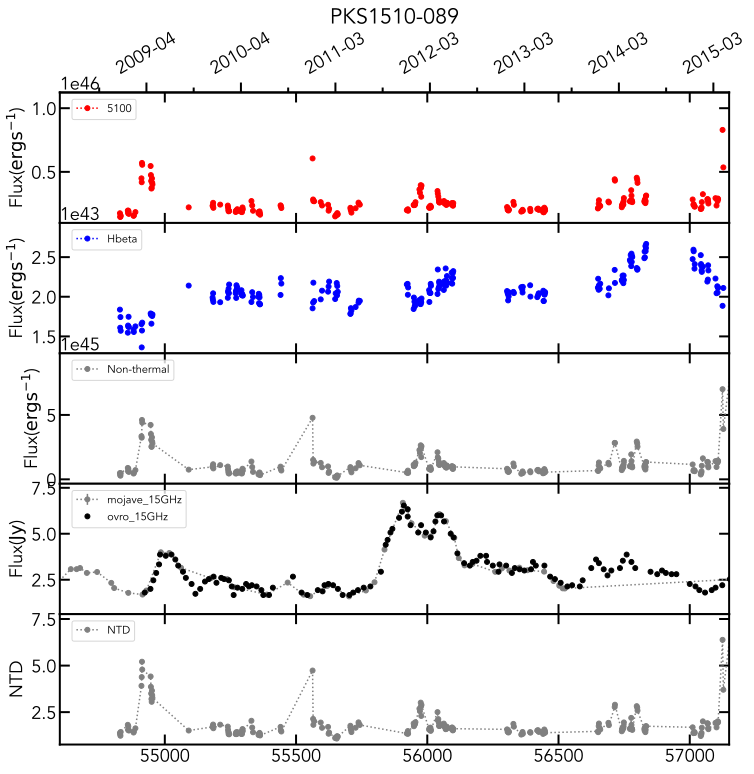

In [151]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(511)

for i in range(len(data_PKS1510)):
    
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100,
              ls=':',marker='.',color='r',markersize=10,label='5100')
    
ax2 = fig.add_subplot(512,sharex=ax)
for i in range(len(data_PKS1510)):
    #print(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510)    
    ax2.errorbar(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510,
              ls=':',marker='.',color='blue',markersize=10,label='Hbeta')

    

#x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100)
#y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510)
ax3_3 = fig.add_subplot(513,sharex=ax)
ax3_3.errorbar(data_PKS1510['MJD'],data_PKS1510['L5100minusLp'],
              ls=':',marker='.',markersize=10,color='grey',label='Non-thermal')



#ax2=ax.twinx()
ax3 = fig.add_subplot(514,sharex=ax)
ax3.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls=':',marker='.',markersize=10,color='grey',label='mojave_15GHz')

#table_OVRO_PKS1510_extract[['mjd','flux_15GHZ_ovro','err']]
ax3.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')

ax4 = fig.add_subplot(515,sharex=ax)

ax4.errorbar(data_PKS1510['MJD'],data_PKS1510['NTD'],
              ls=':',marker='.',markersize=10,color='grey',label='NTD')






 

ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
ax2.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')

ax3_3.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
ax3.set_ylabel(r'Flux($\mathrm{Jy}$)')
ax4.set_ylabel(r'NTD')



set_ax_tick(ax) 





set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax4,bbox_to_anchor=(0.01, 0.99))

set_ax_tick(ax) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 
set_ax_tick(ax3_3) 
set_ax_tick(ax4) 

plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800-200,57150)

ax.set_xlim(range_l,range_r)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_lc_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




# PKS 0736

# get_data_name(sourcename)

In [ ]:
def get_Rdata_name(name_i):
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or \
    source_Name_i.startswith('1ES') or \
    source_Name_i.startswith('1H') or \
    source_Name_i.startswith('AO'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0     
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]
        Rdata_source=Rdata_source.append(Rphot_name,ignore_index=True)
        
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

In [ ]:
def get_Vdata_name(name_i):
    
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
       
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)  
            Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
        
    
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

In [ ]:
def get_Poldata_name(name_i):
    
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()

        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)    
            Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
        
    
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

In [ ]:
source_Name='3C 273'
name_i=source_Name

source_Name_i=name_i.strip()

source_name_i=Source_name_dict[source_Name_i]

In [ ]:
prefix=''
Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
if os.path.exists(Polpath):
    Poldata=pd.read_excel(Polpath)    

In [ ]:
Polpath

Poldata

In [ ]:
source_Name='3C 273'
Rband_data_source=get_Rdata_name(source_Name)

In [ ]:
Rdata_source

Lum_Rdata_source=Rdata_source

Lum_Rdata_source

In [ ]:
source_Name='3C 273'
Poldata_source=get_Poldata_name(source_Name)

In [ ]:
Poldata_source

In [ ]:
source_Name='3C 273'
Vdata_source=get_Vdata_name(source_Name)

In [ ]:
Vdata_source

# def write_lagfile

In [67]:
def write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>=rangemin]
    data1= data1[data1['t']<=rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    #if os.path.exists(path_data1):
        #os.remove(path_data1)
    data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    data2= dataname2[dataname2['t']>=rangemin]
    data2= data2[data2['t']<=rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    #if os.path.exists(path_data2):
        #os.remove(path_data2)            
    data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2    

In [68]:
def get_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    #data1= dataname1[dataname1['t']>rangemin]
    #data1= data1[data1['t']<rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    #data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    #data2= dataname2[dataname2['t']>rangemin]
    #data2= data2[data2['t']<rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    #data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2 

In [69]:
def write_javelin_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>=rangemin]
    data1= data1[data1['t']<=rangemax]   
    data1=data1.sort_values('t')
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    if os.path.exists(path_data1):
        os.remove(path_data1)
    data1.to_csv(path_data1,index=False,header=False,sep=' ')
    
    data2= dataname2[dataname2['t']>=rangemin]
    data2= data2[data2['t']<=rangemax] 
    data2=data2.sort_values('t')
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    if os.path.exists(path_data2):
        os.remove(path_data2)    
    data2.to_csv(path_data2,index=False,header=False,sep=' ')  
    return path_data1,path_data2    

# def fermi_monitor_mag_to_flux

The adopted conversion from flux density (in mJy = 10-26 erg cm-2 s-1 Hz-1) to V apparent magnitude 
is given by V = 15 - 2.5 log (Fν/3.64).

In [ ]:
def fermi_monitor_mag_to_flux(data,maglabel_w1,e_maglabel_w1,D_cm):    
    data['logL_V']= (15-data[maglabel_w1])/2.5+np.log10(3.64)+np.log10(4*np.pi*D_cm**2) -26
    #data['logL_W2']= (-48.6-data[maglabel_w2]-3.339)/2.5+np.log10(4*np.pi*D_cm**2)
    data['e_logL_V'] =   data[e_maglabel_w1]/2.5
    #data['e_logL_W2'] =   data[e_maglabel_w2]/2.5
    return data

# CCF

## def run_ccf

In [76]:
def run_ccf(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir)
    
    source_path=os.path.join(rootdir,sourcename)
    
    path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py %s %s %s %s %d %d %d %d %s'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh,source_path)
    print(command)
    os.system(command)  

## def plot_ccf

In [80]:
def plot_ccf(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir)
    source_path=os.path.join(rootdir,sourcename)
    path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='python CCF_plot.py %s %s %s %s %d %d %d %d %s'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh,source_path)
    print(command)
    os.system(command)    

In [57]:
rootdir_ccf='%s/00CCF/'%root_dir
if not os.path.exists(rootdir_ccf):
    os.mkdir(rootdir_ccf)
    print(rootdir_ccf)

In [58]:
print(rootdir_ccf)

/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/


In [59]:
ls /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/

3C273/          CCF_plot.py*    PYCCF.py*       get-pip.py*
CCF_cpython.py* PKS1510/        PYCCF.pyc*      xcorspc.so*


## 3C 273

In [ ]:
source_Name='3C 273'
source_name=Source_name_dict[source_Name]
source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
D_cm=cosmo.luminosity_distance(source_z.values[0]).to(u.cm)

In [ ]:
Vdata_source=get_Vdata_name(source_Name)
maglabel_w1=Vdata_source.columns[7]
e_maglabel_w1=Vdata_source.columns[8]
Lum_Vdata_source=fermi_monitor_mag_to_flux(Vdata_source,maglabel_w1,e_maglabel_w1,D_cm.value) 

In [ ]:
lag_Vdata_source=Lum_Vdata_source[['mjd','logL_V','e_logL_V']]
lag_Vdata_source.columns=['t','flux','flux_err']
lag_Vdata_source=lag_Vdata_source.sort_values(['t'])

In [ ]:
Rdata_source=get_Rdata_name(source_Name)

maglabel_w1=Rdata_source.columns[7]
e_maglabel_w1=Rdata_source.columns[8]
Lum_Rdata_source=fermi_monitor_mag_to_flux(Rdata_source,maglabel_w1,e_maglabel_w1,D_cm.value) 

Lum_Rdata_source.columns

In [ ]:
lag_Rdata_source=Lum_Rdata_source[['mjd','logL_V','e_logL_V']]
lag_Rdata_source.columns=['t','flux','flux_err']
lag_Rdata_source=lag_Rdata_source.sort_values(['t'])

In [ ]:
len(lag_Vdata_source)

lag_Vdata_source

In [ ]:
source_Name='3C 273'
Poldata_source=get_Poldata_name(source_Name)
Poldata_source['snr']=Poldata_source[Poldata_source.columns[9]]/Poldata_source[Poldata_source.columns[10]]

In [ ]:
Poldata_source_snr=Poldata_source[Poldata_source['snr']>5]

Poldata_source_snr

In [ ]:
lag_Poldata_source=Poldata_source_snr[['mjd',Poldata_source.columns[9],Poldata_source.columns[10]]]
lag_Poldata_source.columns=['t','Pol','Pol_err']
lag_Poldata_source=lag_Poldata_source.sort_values(['t'])

In [ ]:
len(lag_Poldata_source)

lag_Poldata_source

In [ ]:
labelname1="V"
labelname2="Pol"
dataname1=lag_Vdata_source
dataname2=lag_Poldata_source

sourcename_label='3C273'
rangemin,rangemax=54500,58500
lagrangel=-300
lagrangeh=300

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="V"
labelname2="R"
dataname1=lag_Vdata_source
dataname2=lag_Rdata_source

sourcename_label='3C273'
rangemin,rangemax=54500,58500
lagrangel=-100
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

###  L5100_LHbeta_Jet_lag

In [ ]:
data_3C273.colnames

In [ ]:
lag_5100_source=data_3C273[['mjd1','F5100','e_F5100']].to_pandas()
lag_5100_source.columns=['t','flux','flux_err']
lag_5100_source=lag_5100_source.sort_values(['t'])

In [ ]:
lag_Hbeta_source=data_3C273[['mjd1','FHbeta','e_FHbeta']].to_pandas()
lag_Hbeta_source.columns=['t','flux','flux_err']
lag_Hbeta_source=lag_Hbeta_source.sort_values(['t'])

In [ ]:
lag_15GHz_3c273=mojave_15GHz_3c273[['mjd','flux','err']]
lag_15GHz_3c273.columns=['t','flux','err']
lag_15GHz_3c273=lag_15GHz_3c273.sort_values('t')

In [ ]:
lag_15GHz_3c273_ovro=ovro_40m_3C273[['mjd','flux','flux err']]
lag_15GHz_3c273_ovro.columns=['t','flux','err']
lag_15GHz_3c273_ovro=lag_15GHz_3c273_ovro.sort_values('t')

In [ ]:
Jet3C273_decomp.columns

In [ ]:
lag_Jetdecomp_3c273=Jet3C273_decomp[['mjd','Jetflux_V','err_Jetflux_V']]
lag_Jetdecomp_3c273.columns=['t','flux','err']
lag_Jetdecomp_3c273=lag_Jetdecomp_3c273.sort_values('t')

In [ ]:
lag_Diskdecomp_3c273=Disk3C273_decomp[['mjd','Diskflux_V','err_Diskflux_V']]
lag_Diskdecomp_3c273.columns=['t','flux','err']
lag_Diskdecomp_3c273=lag_Diskdecomp_3c273.sort_values('t')

In [ ]:
labelname1="Diskdecomp"
labelname2="Hbeta"
dataname1=lag_Diskdecomp_3c273
dataname2=lag_Hbeta_source

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=0
lagrangeh=400

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="Hbeta"
dataname1=lag_5100_source
dataname2=lag_Hbeta_source

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=0
lagrangeh=400

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="15GHz_vlba"
dataname1=lag_5100_source
dataname2=lag_15GHz_3c273

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=800

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="15GHz_ovro"
dataname1=lag_5100_source
dataname2=lag_15GHz_3c273_ovro

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="Jetdecomp"
labelname2="15GHz_vlba"
dataname1=lag_Jetdecomp_3c273
dataname2=lag_15GHz_3c273

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="Jetdecomp"
labelname2="15GHz_ovro"
dataname1=lag_Jetdecomp_3c273
dataname2=lag_15GHz_3c273_ovro

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

## PKS 1510

In [64]:
!which python

/Users/lyubing/opt/anaconda3/bin/python


In [82]:
labelname1="5100"
labelname2="Hbeta"
dataname1=lag_PKS1510_5100
dataname2=lag_PKS1510_FHb

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=0
lagrangeh=180

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100Hbeta_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/Hbeta5100_54600_55500.csv 5100 Hbeta 54600 55500 0 180 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
('5100', 'Hbeta')
Failed centroids:  3851
Failed peaks:  3851
Centroid, error:    113.935  (+     3.065 -     7.358)
Peak, errors:    117.000  (+     6.065 -     2.935)


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [83]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100Hbeta_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/Hbeta5100_54600_55500.csv 5100 Hbeta 54600 55500 0 180 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
5100 Hbeta


In [86]:
labelname1="5100D"
labelname2="HbetaD"
dataname1=lag_PKS1510_5100D
dataname2=lag_PKS1510_FHbD

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=0
lagrangeh=180

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100DHbetaD_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/HbetaD5100D_54600_55500.csv 5100D HbetaD 54600 55500 0 180 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
('5100D', 'HbetaD')
Failed centroids:  5096
Failed peaks:  5096
Centroid, error:    114.187  (+     5.766 -     6.022)
Peak, errors:    117.000  (+     5.813 -     3.187)


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [87]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100DHbetaD_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/HbetaD5100D_54600_55500.csv 5100D HbetaD 54600 55500 0 180 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
5100D HbetaD


In [88]:
labelname1="5100D"
labelname2="OVRO_15GHz"
dataname1=lag_PKS1510_5100D
dataname2=lag_PKS1510_ovro

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,56550)
lagrangel=0
lagrangeh=500

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100DOVRO_15GHz_54600_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHz5100D_54600_56550.csv 5100D OVRO_15GHz 54600 56550 0 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
('5100D', 'OVRO_15GHz')
Failed centroids:  21975
Failed peaks:  21975
Centroid, error:     70.641  (+     8.574 -     4.477)
Peak, errors:     69.000  (+     7.359 -     7.641)


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [89]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100DOVRO_15GHz_54600_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHz5100D_54600_56550.csv 5100D OVRO_15GHz 54600 56550 0 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
5100D OVRO_15GHz


In [90]:
labelname1="5100D"
labelname2="OVRO_15GHz"
dataname1=lag_PKS1510_5100D
dataname2=lag_PKS1510_ovro

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=0
lagrangeh=500

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100DOVRO_15GHz_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHz5100D_54600_55500.csv 5100D OVRO_15GHz 54600 55500 0 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
('5100D', 'OVRO_15GHz')
Failed centroids:  1713
Failed peaks:  1713
Centroid, error:     66.203  (+     7.304 -     7.401)
Peak, errors:     69.000  (+     5.797 -     3.203)


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [91]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100DOVRO_15GHz_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHz5100D_54600_55500.csv 5100D OVRO_15GHz 54600 55500 0 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
5100D OVRO_15GHz


In [92]:
labelname1="5100D"
labelname2="OVRO_15GHz"
dataname1=lag_PKS1510_5100D
dataname2=lag_PKS1510_ovro

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(55500,56550)
lagrangel=0
lagrangeh=500

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100DOVRO_15GHz_55500_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHz5100D_55500_56550.csv 5100D OVRO_15GHz 55500 56550 0 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
('5100D', 'OVRO_15GHz')
Failed centroids:  4604
Failed peaks:  4604
Centroid, error:     74.345  (+   414.655 -    12.685)
Peak, errors:     72.000  (+   414.655 -    11.345)


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [93]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/5100DOVRO_15GHz_55500_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHz5100D_55500_56550.csv 5100D OVRO_15GHz 55500 56550 0 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
5100D OVRO_15GHz


In [95]:
labelname1="FHbD"
labelname2="OVRO_15GHz"
dataname1=lag_PKS1510_FHbD
dataname2=lag_PKS1510_ovro

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=-500
lagrangeh=500

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FHbDOVRO_15GHz_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzFHbD_54600_55500.csv FHbD OVRO_15GHz 54600 55500 -500 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/00CCF/PYCCF.py:153: RuntimeWarning: invalid value encountered in sqrt
  tst = r*np.sqrt(v/(1-r2))
/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('FHbD', 'OVRO_15GHz')
Failed centroids:  17913
Failed peaks:  17913
Centroid, error:   -422.041  (+   349.487 -    26.960)
Peak, errors:   -431.000  (+   348.041 -    32.959)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FHbDOVRO_15GHz_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzFHbD_54600_55500.csv FHbD OVRO_15GHz 54600 55500 -500 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
FHbD OVRO_15GHz


In [96]:
labelname1="FHbD"
labelname2="OVRO_15GHz"
dataname1=lag_PKS1510_FHbD
dataname2=lag_PKS1510_ovro

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(55500,56550)
lagrangel=-500
lagrangeh=500

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FHbDOVRO_15GHz_55500_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzFHbD_55500_56550.csv FHbD OVRO_15GHz 55500 56550 -500 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('FHbD', 'OVRO_15GHz')
Failed centroids:  85
Failed peaks:  85
Centroid, error:   -168.602  (+    14.702 -    10.162)
Peak, errors:   -173.000  (+    16.602 -    10.398)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FHbDOVRO_15GHz_55500_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzFHbD_55500_56550.csv FHbD OVRO_15GHz 55500 56550 -500 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
FHbD OVRO_15GHz


In [ ]:
lag_PKS1510_L5100minusLp

In [143]:
labelname1="Nonthermal"
labelname2="OVRO_15GHz"
dataname1=lag_PKS1510_L5100minusLp
dataname2=lag_PKS1510_ovro

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,56550)
lagrangel=-500
lagrangeh=500

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/NonthermalOVRO_15GHz_54600_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzNonthermal_54600_56550.csv Nonthermal OVRO_15GHz 54600 56550 -500 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('Nonthermal', 'OVRO_15GHz')
Failed centroids:  1278
Failed peaks:  1278
Centroid, error:    -80.040  (+    20.895 -    28.338)
Peak, errors:    -77.000  (+    24.040 -    32.960)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/NonthermalOVRO_15GHz_54600_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzNonthermal_54600_56550.csv Nonthermal OVRO_15GHz 54600 56550 -500 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
Nonthermal OVRO_15GHz


In [146]:
labelname1="Nonthermal"
labelname2="OVRO_15GHz"
dataname1=lag_PKS1510_L5100minusLp
dataname2=lag_PKS1510_ovro

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=-100
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/NonthermalOVRO_15GHz_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzNonthermal_54600_55500.csv Nonthermal OVRO_15GHz 54600 55500 -100 200 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('Nonthermal', 'OVRO_15GHz')
Failed centroids:  0
Failed peaks:  0
Centroid, error:     68.028  (+     7.451 -     8.577)
Peak, errors:     68.000  (+     5.972 -     3.028)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/NonthermalOVRO_15GHz_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzNonthermal_54600_55500.csv Nonthermal OVRO_15GHz 54600 55500 -100 200 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
Nonthermal OVRO_15GHz


In [145]:
labelname1="Nonthermal"
labelname2="OVRO_15GHz"
dataname1=lag_PKS1510_L5100minusLp
dataname2=lag_PKS1510_ovro

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(55500,56550)
lagrangel=-500
lagrangeh=500

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/NonthermalOVRO_15GHz_55500_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzNonthermal_55500_56550.csv Nonthermal OVRO_15GHz 55500 56550 -500 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('Nonthermal', 'OVRO_15GHz')
Failed centroids:  450
Failed peaks:  450
Centroid, error:    -82.693  (+    17.848 -     9.911)
Peak, errors:    -68.000  (+    20.693 -    21.307)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/NonthermalOVRO_15GHz_55500_56550.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/OVRO_15GHzNonthermal_55500_56550.csv Nonthermal OVRO_15GHz 55500 56550 -500 500 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
Nonthermal OVRO_15GHz


In [150]:
labelname1="Nonthermal"
labelname2="Combine_15GHz"
dataname1=lag_PKS1510_L5100minusLp
dataname2=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=-200
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/NonthermalCombine_15GHz_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/Combine_15GHzNonthermal_54600_55500.csv Nonthermal Combine_15GHz 54600 55500 -200 200 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('Nonthermal', 'Combine_15GHz')
Failed centroids:  0
Failed peaks:  0
Centroid, error:     67.408  (+     5.713 -     4.786)
Peak, errors:     70.000  (+     5.592 -    -2.592)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/NonthermalCombine_15GHz_54600_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/Combine_15GHzNonthermal_54600_55500.csv Nonthermal Combine_15GHz 54600 55500 -200 200 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
Nonthermal Combine_15GHz


In [164]:
labelname1="FHb"
labelname2="Combine_15GHz"
dataname1=lag_PKS1510_FHb
dataname2=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800,55500)
lagrangel=-200
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FHbCombine_15GHz_54800_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/Combine_15GHzFHb_54800_55500.csv FHb Combine_15GHz 54800 55500 -200 200 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('FHb', 'Combine_15GHz')
Failed centroids:  3488
Failed peaks:  3488
Centroid, error:    -80.019  (+    20.150 -    13.801)
Peak, errors:    -83.000  (+    24.019 -    17.981)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FHbCombine_15GHz_54800_55500.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/Combine_15GHzFHb_54800_55500.csv FHb Combine_15GHz 54800 55500 -200 200 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
FHb Combine_15GHz


# Javelin

## def run_javelin

In [ ]:
def run_javelin(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30,widthl=0,widthh=200):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir_javelin)
    
    source_path=os.path.join(rootdir_javelin,sourcename)
    path_data1,path_data2=write_javelin_lagfile(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='python javelin_spec.py %s %s %d %d %d %d %d %d %s'%(path_data1,path_data2,rangemin,rangemax,lagrangel,lagrangeh,widthl,widthh,source_path)
    print(command)
    os.system(command)  

In [ ]:
rootdir_javelin='%s/00Javelin/'%root_dir
if not os.path.exists(rootdir_javelin):
    os.mkdir(rootdir_javelin)
    print(rootdir_javelin)
    

In [ ]:
print(rootdir_javelin)

# plot_lag_correlation

In [ ]:
plot_laged_lum=pd.DataFrame([])
#plot_laged_lum.columns=['time1','Lum1','time2','flux2']

In [ ]:
def get_laged_lum_correlation(time1,Lum1,time2,Lum2,timebin=1):
    time1s=[]
    Lum1s=[]
    time2s=[]
    Lum2s=[]
    
    plot_laged_lum=pd.DataFrame([])    
    for index_,(time_,lum_) in enumerate(zip(time1,Lum1)):
        
        mjd_near_i=np.argmin(abs(time2-time_))  
        mjd_near=time2[mjd_near_i] 
        
        Lum2_near=Lum2[mjd_near_i]
             
        if abs(mjd_near-time_)<timebin:
            time1s.append(time_)
            Lum1s.append(lum_)
            
            time2s.append(mjd_near)
            Lum2s.append(Lum2_near)
            
            
    return  time1s,Lum1s,time2s,Lum2s      

In [ ]:
laged_data_3C273=data_3C273.copy()
laged_data_3C273['lag_JD1']=laged_data_3C273['JD1']-194.9

In [ ]:
laged_data_3C273.colnames

In [ ]:
time1=laged_data_3C273[laged_data_3C273.colnames[0]]
Lum1=laged_data_3C273[laged_data_3C273.colnames[1]]
time2=laged_data_3C273['lag_JD1']
Lum2=laged_data_3C273[laged_data_3C273.colnames[3]]
time1s,Lum1s,time2s,Lum2s=get_laged_lum_correlation(time1,Lum1,time2,Lum2,timebin=9)

## plot_3C273

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''
flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)

flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13


for time1s_,Lum1s_,time2s_,Lum2s_ in zip(time1s,Lum1s,time2s,Lum2s):    
    ax.errorbar(x=np.log10(Lum1s_*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(Lum2s_*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='L5100 Vs (Hbeta-194.9d)',
               color='grey')


slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))

    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/3C273_laged_Hbeta_L5100.png',dpi=400)


## clip_fit_3C273

In [ ]:
xdatas=np.log10(np.array(Lum1s)*flux_scale_5100*5100)
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
ydatas=np.log10(np.array(Lum2s)*flux_scale_Hbeta)

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
len(xdatas),len(ydatas)

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_3C273_lag, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(6,6))
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_3C273_lag(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line_3C273_lag

In [ ]:
laged_data_3C273.colnames

In [ ]:
time_label=data_3C273.colnames[0]
flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(time_label)
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''
flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)

flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13


ax.errorbar(x=np.log10(data_3C273[flux_label]*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1]*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')



slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))

    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0,44.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/3C273_Hbeta_L5100.png',dpi=400)


## plot_PKS1510

In [ ]:
laged_data_PKS1510.colnames

In [ ]:
laged_data_PKS1510=data_PKS1510.copy()
laged_data_PKS1510['lag_MJD']=laged_data_PKS1510['MJD']-61.1

In [ ]:
print(laged_data_PKS1510.colnames)

In [ ]:
time1=laged_data_PKS1510[laged_data_PKS1510.colnames[0]]
Lum1=laged_data_PKS1510[laged_data_PKS1510.colnames[1]]
time2=laged_data_PKS1510['lag_MJD']
Lum2=laged_data_PKS1510[laged_data_PKS1510.colnames[3]]
time1s,Lum1s,time2s,Lum2s=get_laged_lum_correlation(time1,Lum1,time2,Lum2,timebin=0.5)


In [ ]:
len(time1s),len(Lum1s),len(time2s),len(Lum2s),

time1s,Lum1s,time2s,Lum2s

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

for time1s_,Lum1s_,time2s_,Lum2s_ in zip(time1s,Lum1s,time2s,Lum2s):
    ax.errorbar(x=np.log10(Lum1s_*flux_scale_5100_PKS1510*5100),
                #xerr=np.log10(data_PKS1510[e_flux_label]*flux_scale*5100),
                y=np.log10(Lum2s_*flux_scale_Hbeta_PKS1510),
                #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
                fmt='.',label='L5100 Vs (Hbeta-61.1d)',
                color='grey')


slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45,46)
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('PKS 1510')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.,46)
ax.set_ylim(43.0-0.2,44.0-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/PKS1510_laged_Hbeta_L5100.png',dpi=400)

## clip_fit PKS1510

In [ ]:
xdatas=np.log10(np.array(Lum1s)*flux_scale_5100_PKS1510*5100)
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
ydatas=np.log10(np.array(Lum2s)*flux_scale_Hbeta_PKS1510)

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.5)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_PKS1510_lag, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(6,6))
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_PKS1510_lag(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line_PKS1510_lag

# MICA2

In [ ]:
def likelihood_probability(Con,Radio,Hbeta)